In [64]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
df = pd.read_csv("combined_data3.csv")

In [65]:
df.insert(0, 'ID', range(1, len(df) + 1))

In [66]:
df

,ID,Profile Names,Headphone name,Price,Rating stars,Link,Image,Review Ratings,Review Title,Review Content
0,1,Stoney,"Sony ZX Series Wired On-Ear Headphones, Black ...",0.00,4.5 out of 5 stars,https://www.amazon.com/Sony-MDRZX110-BLK-Stere...,https://m.media-amazon.com/images/I/71ZC0hq5mG...,5.0,>>> DOES THE JOB,IN SHORT\n> Great for the price. Very good sou...
1,2,ronan johnston,Sony WH-CH520 Wireless Headphones Bluetooth On...,38.00,4.5 out of 5 stars,https://www.amazon.com/Sony-WH-CH520-Headphone...,https://m.media-amazon.com/images/I/41lArSiD5h...,5.0,"comfortable with a good sound quality, though ...",overall - 4.5 stars\nmy main complaint is the ...
2,3,Erica,"RORSOU R10 Kids Headphones with Microphone, Li...",16.99,4.5 out of 5 stars,https://www.amazon.com/RORSOU-R10-Headphones-M...,https://m.media-amazon.com/images/I/61z-rTknwV...,5.0,Good for school,I'm absolutely thrilled with the Sony wired he...
3,4,Mathias Lopez,JBL Tune 510BT: Wireless On-Ear Headphones wit...,0.00,4.6 out of 5 stars,https://www.amazon.com/JBL-Tune-510BT-Ear-Head...,https://m.media-amazon.com/images/I/61yjoRgptd...,5.0,Good Wireless Headphones!,I've been using these for a couple months now....
4,5,Mlogee Bobee,LORELEI X6 Over-Ear Headphones with Microphone...,20.99,4.4 out of 5 stars,https://www.amazon.com/LORELEI-X6-Headphones-L...,https://m.media-amazon.com/images/I/61ISovvFoZ...,5.0,Works as they should,"Honestly, after getting a string of bad experi..."
...,...,...,...,...,...,...,...,...,...,...
12991,12992,Wineplz,MIDOLA Kids Headphones Wired Volume Limited 85...,14.99,4.2 out of 5 stars,https://www.amazon.com/MIDOLA-Headphones-Folda...,https://m.media-amazon.com/images/I/51ijB2Zyzd...,3.0,Mic broke after a month of use,My 13yr old liked these because they were comf...
12992,12993,Chasity Stewart,MIDOLA Kids Headphones Wired Volume Limited 85...,14.99,4.2 out of 5 stars,https://www.amazon.com/MIDOLA-Headphones-Folda...,https://m.media-amazon.com/images/I/51ijB2Zyzd...,3.0,You get what you pay for.,I've bought ten altogether. I'm not sure what'...
12993,12994,Alexandria Woods,MIDOLA Kids Headphones Wired Volume Limited 85...,14.99,4.2 out of 5 stars,https://www.amazon.com/MIDOLA-Headphones-Folda...,https://m.media-amazon.com/images/I/51ijB2Zyzd...,3.0,Durability Is In Question,The headphones come in separate boxes and have...
12994,12995,KPITT,MIDOLA Kids Headphones Wired Volume Limited 85...,14.99,4.2 out of 5 stars,https://www.amazon.com/MIDOLA-Headphones-Folda...,https://m.media-amazon.com/images/I/51ijB2Zyzd...,3.0,Good for travel,I got this for my son to use with his tablet f...


In [67]:
import pandas as pd
import nltk
from nltk.corpus import words

# Assuming you've already loaded your data into a dataframe named mouse_data

# Create a set of English words
english_words = set(words.words())

def is_english(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return False
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # If there are no tokens, return False
    if not tokens:
        return False
    # Count how many tokens are in the English words set
    english_count = sum(1 for token in tokens if token.lower() in english_words)
    # If more than 70% of words are English, consider it an English text
    return english_count / len(tokens) > 0.7

# Filter the dataframe
df = df[df['Review Content'].apply(is_english)]

In [68]:
df = df.dropna()

In [69]:
df['Review Content'].fillna('', inplace=True)

In [70]:
df['Review Content'] = df['Review Content'].str.strip()

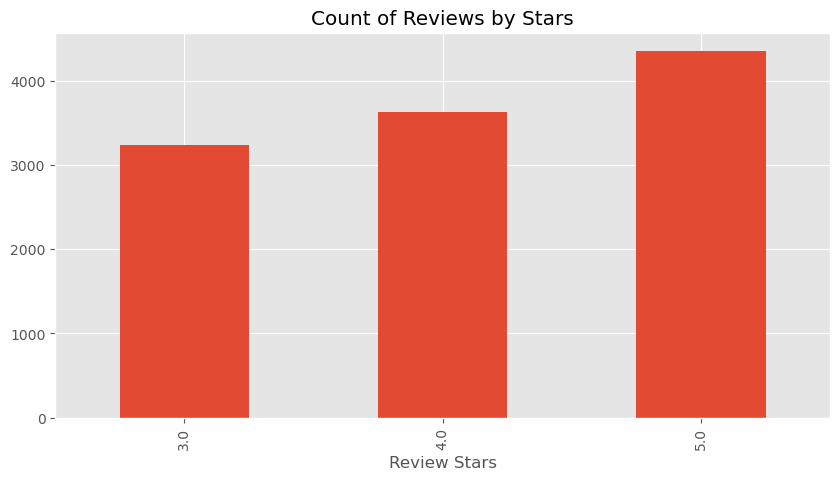

In [71]:
ax = df['Review Ratings'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

VADER Seniment Scoring

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [73]:
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review = row['Review Content']
    myid = row['ID']
    res[myid] = sia.polarity_scores(Review)

  0%|          | 0/11210 [00:00<?, ?it/s]

In [74]:
# Convert results to DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')


In [75]:
vaders.head()

,ID,neg,neu,pos,compound,Profile Names,Headphone name,Price,Rating stars,Link,Image,Review Ratings,Review Title,Review Content
0,2,0.057,0.748,0.195,0.9990,ronan johnston,Sony WH-CH520 Wireless Headphones Bluetooth On...,38.00,4.5 out of 5 stars,https://www.amazon.com/Sony-WH-CH520-Headphone...,https://m.media-amazon.com/images/I/41lArSiD5h...,5.0,"comfortable with a good sound quality, though ...",overall - 4.5 stars\nmy main complaint is the ...
1,3,0.039,0.736,0.225,0.9651,Erica,"RORSOU R10 Kids Headphones with Microphone, Li...",16.99,4.5 out of 5 stars,https://www.amazon.com/RORSOU-R10-Headphones-M...,https://m.media-amazon.com/images/I/61z-rTknwV...,5.0,Good for school,I'm absolutely thrilled with the Sony wired he...
2,4,0.024,0.727,0.250,0.9868,Mathias Lopez,JBL Tune 510BT: Wireless On-Ear Headphones wit...,0.00,4.6 out of 5 stars,https://www.amazon.com/JBL-Tune-510BT-Ear-Head...,https://m.media-amazon.com/images/I/61yjoRgptd...,5.0,Good Wireless Headphones!,I've been using these for a couple months now....
3,5,0.150,0.818,0.031,-0.7604,Mlogee Bobee,LORELEI X6 Over-Ear Headphones with Microphone...,20.99,4.4 out of 5 stars,https://www.amazon.com/LORELEI-X6-Headphones-L...,https://m.media-amazon.com/images/I/61ISovvFoZ...,5.0,Works as they should,"Honestly, after getting a string of bad experi..."
4,6,0.074,0.794,0.132,0.5267,catgod38,"Bluetooth Headphones Over Ear,BERIBES 65H Play...",21.99,4.5 out of 5 stars,https://www.amazon.com/Bluetooth-Headphones-BE...,https://m.media-amazon.com/images/I/617c1ziVVN...,5.0,It works,Hello my name is (insert name here)\nI like li...


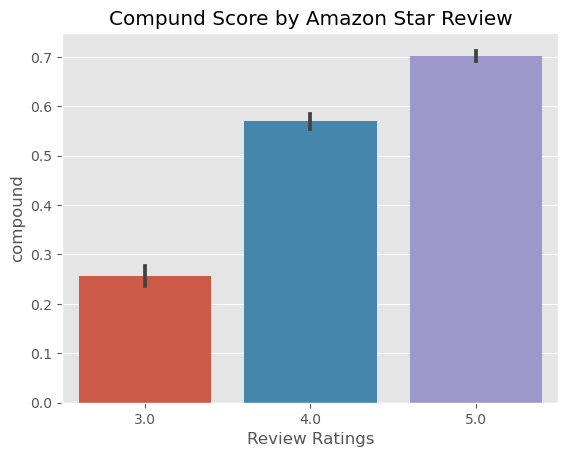

In [76]:
ax = sns.barplot(data=vaders, x='Review Ratings', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

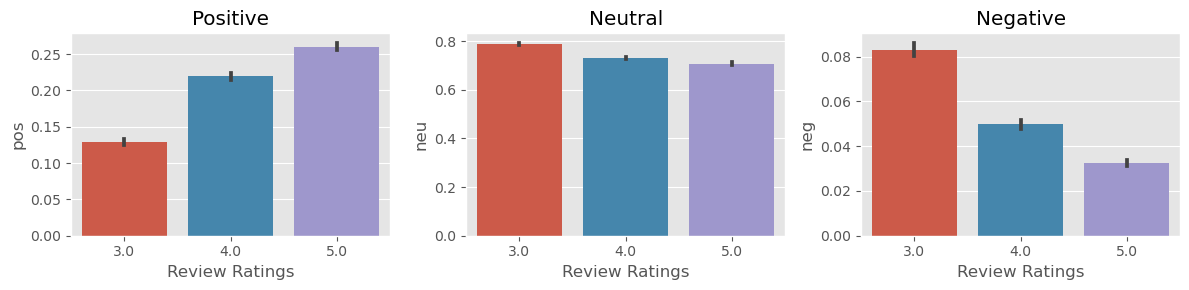

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Review Ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Review Ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Review Ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model

In [78]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [79]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [80]:
if torch.cuda.is_available():
    model.to('cuda')

def get_sentiment_scores(review_text):
    # Tokenize input and get output from the model
    encoded_input = tokenizer.encode(review_text, return_tensors='pt', truncation=True, max_length=512)
    
    # Move encoded input to GPU if CUDA is available
    if torch.cuda.is_available():
        encoded_input = encoded_input.to('cuda')
    
    with torch.no_grad():
        output = model(encoded_input)

    # Convert logits to probabilities
    probs = softmax(output.logits.cpu().numpy(), axis=1).flatten()  # Move logits to CPU for NumPy operations

    # Create a dictionary with sentiment scores
    sentiment_scores = {
        'neg': probs[0],
        'neu': probs[1],
        'pos': probs[2]
    }
    return sentiment_scores
# Apply sentiment analysis to filtered reviews
df['Sentiment Scores'] = df['Review Content'].apply(get_sentiment_scores)

In [81]:
# Extract the 'pos' value from 'Sentiment Scores' and create a new column 'Positive Score'
df['Positive'] = df['Sentiment Scores'].apply(lambda x: x['pos'])
df['Neutral'] = df['Sentiment Scores'].apply(lambda x: x['neu'])
df['Negative'] = df['Sentiment Scores'].apply(lambda x: x['neg'])

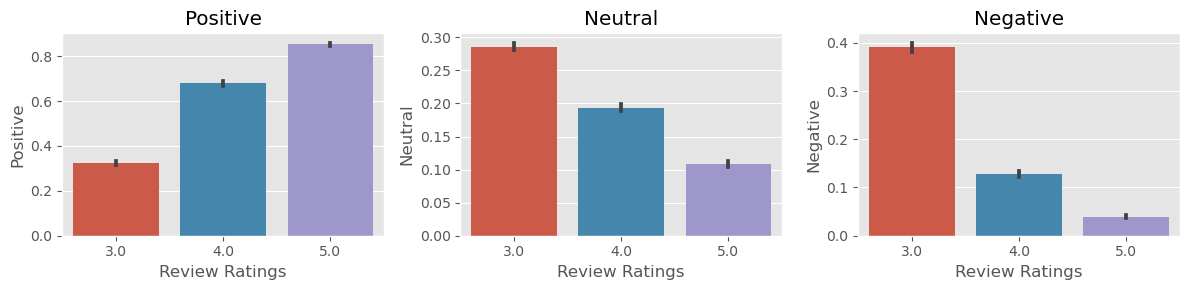

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Review Ratings', y='Positive', ax=axs[0])
sns.barplot(data=df, x='Review Ratings', y='Neutral', ax=axs[1])
sns.barplot(data=df, x='Review Ratings', y='Negative', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

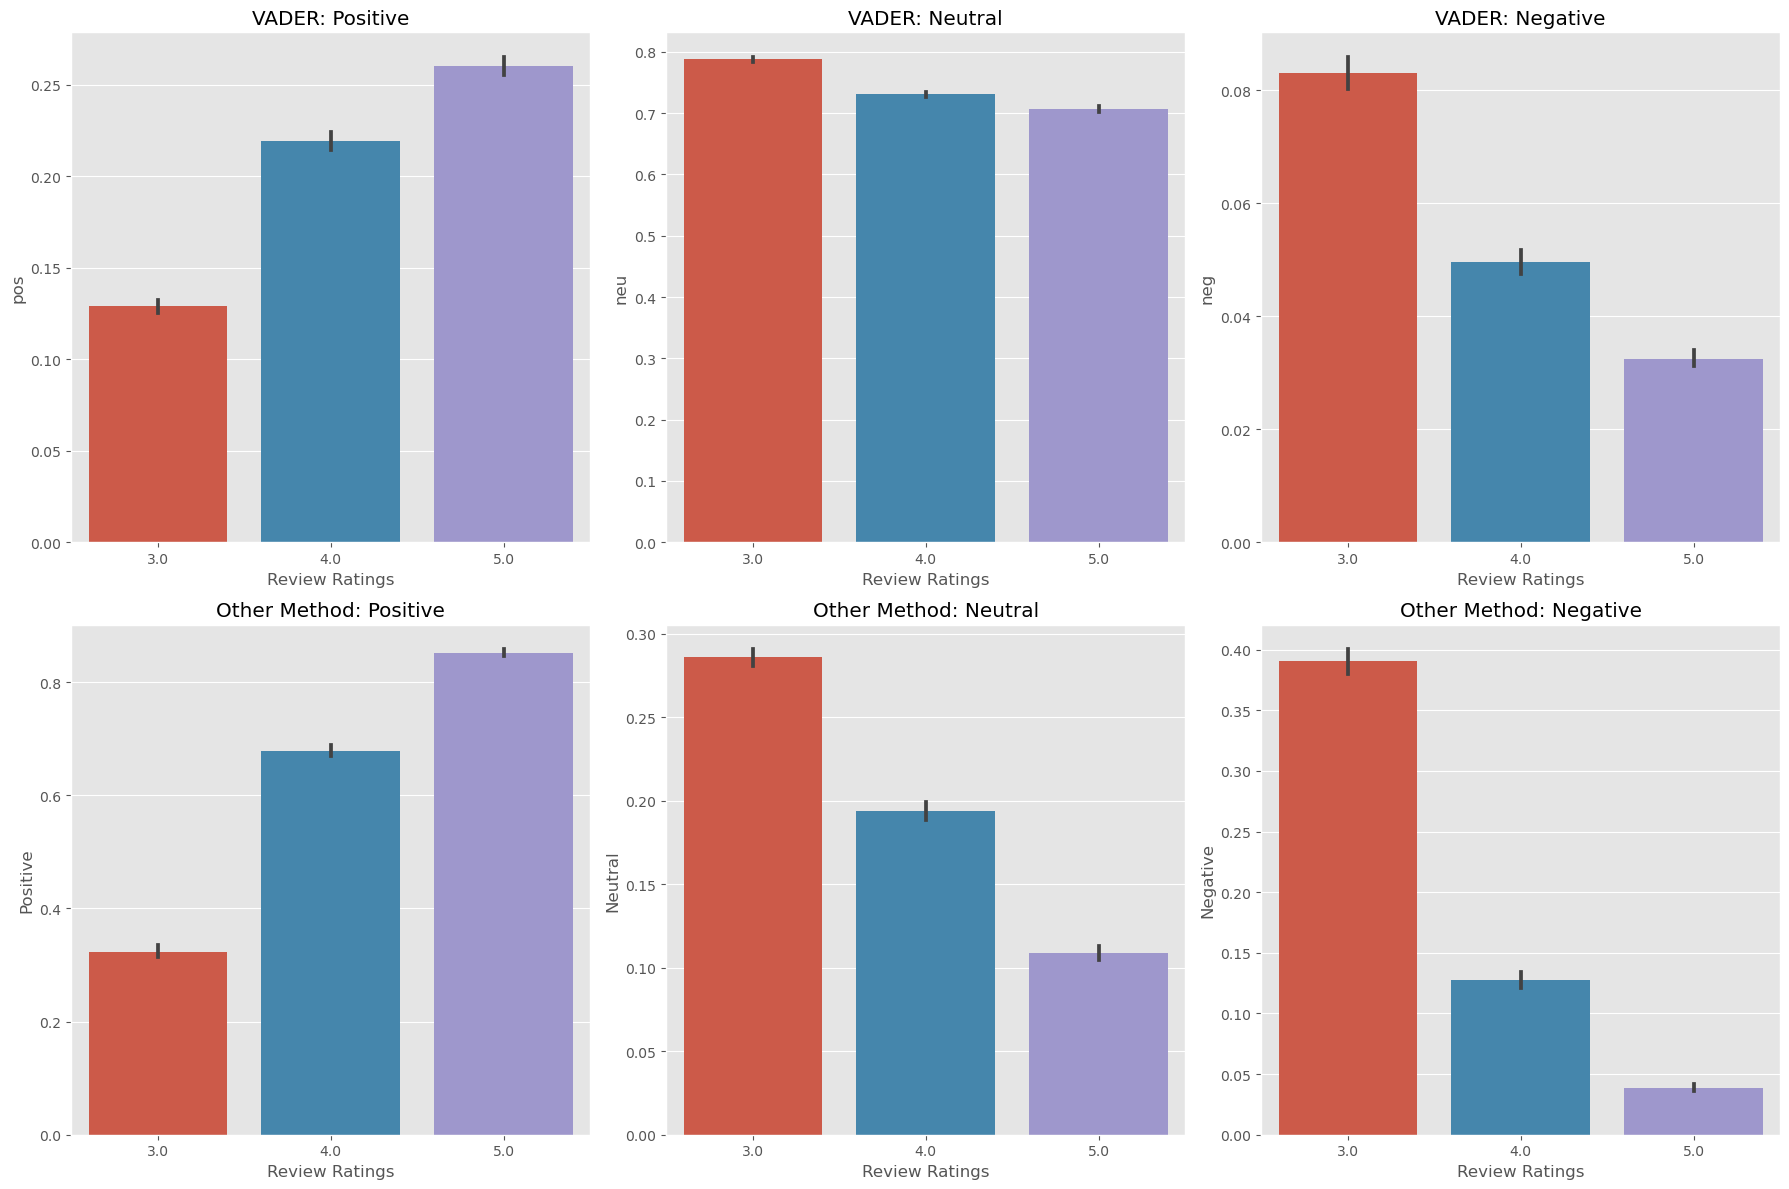

In [88]:
# Import the required libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger subplot grid to place the two sets of bar plots next to each other
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot the VADER sentiment scores
sns.barplot(data=vaders, x='Review Ratings', y='pos', ax=axs[0, 0])
sns.barplot(data=vaders, x='Review Ratings', y='neu', ax=axs[0, 1])
sns.barplot(data=vaders, x='Review Ratings', y='neg', ax=axs[0, 2])

# Set titles for the VADER plots
axs[0, 0].set_title('VADER: Positive')
axs[0, 1].set_title('VADER: Neutral')
axs[0, 2].set_title('VADER: Negative')

# Plot the other method's sentiment scores
sns.barplot(data=df, x='Review Ratings', y='Positive', ax=axs[1, 0])
sns.barplot(data=df, x='Review Ratings', y='Neutral', ax=axs[1, 1])
sns.barplot(data=df, x='Review Ratings', y='Negative', ax=axs[1, 2])

# Set titles for the other method's plots
axs[1, 0].set_title('Other Method: Positive')
axs[1, 1].set_title('Other Method: Neutral')
axs[1, 2].set_title('Other Method: Negative')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()